In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
import datetime
import pytest
import pandas_helper_calc  # noqa
from pandas.testing import assert_series_equal

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
path = '/Users/ahelgeso/Documents/GitHub/bball-master/Stat Sheets'
os.chdir(path)

In [40]:
names = ['2015stats','2016stats','2017stats','2018stats','2019stats']
league = ['2015LeagueStats', '2016LeagueStats', '2017LeagueStats','2018LeagueStats','2019LeagueStats']

In [7]:
db19 = pd.read_csv('2019stats.csv')
db15 = pd.read_csv('2015stats.csv')
db16 = pd.read_csv('2016stats.csv')
db17 = pd.read_csv('2017stats.csv')
db18 = pd.read_csv('2018stats.csv')

db = pd.concat([db15, db16, db17, db18, db19]).reset_index(drop = True)

In [8]:
a = db19

In [50]:
leaguestats = pd.read_csv('2019LeagueStats.csv')

In [54]:
leagueEFG = pd.DataFrame()
for date in a[a['Team']=='CLE']['Date']:
    leagueEFG = pd.concat([leagueEFG, leaguestats[leaguestats['Date']==date]])

In [58]:
leagueEFG.reset_index(drop = True, inplace = True)

NameError: name 'leagueEFG' is not defined

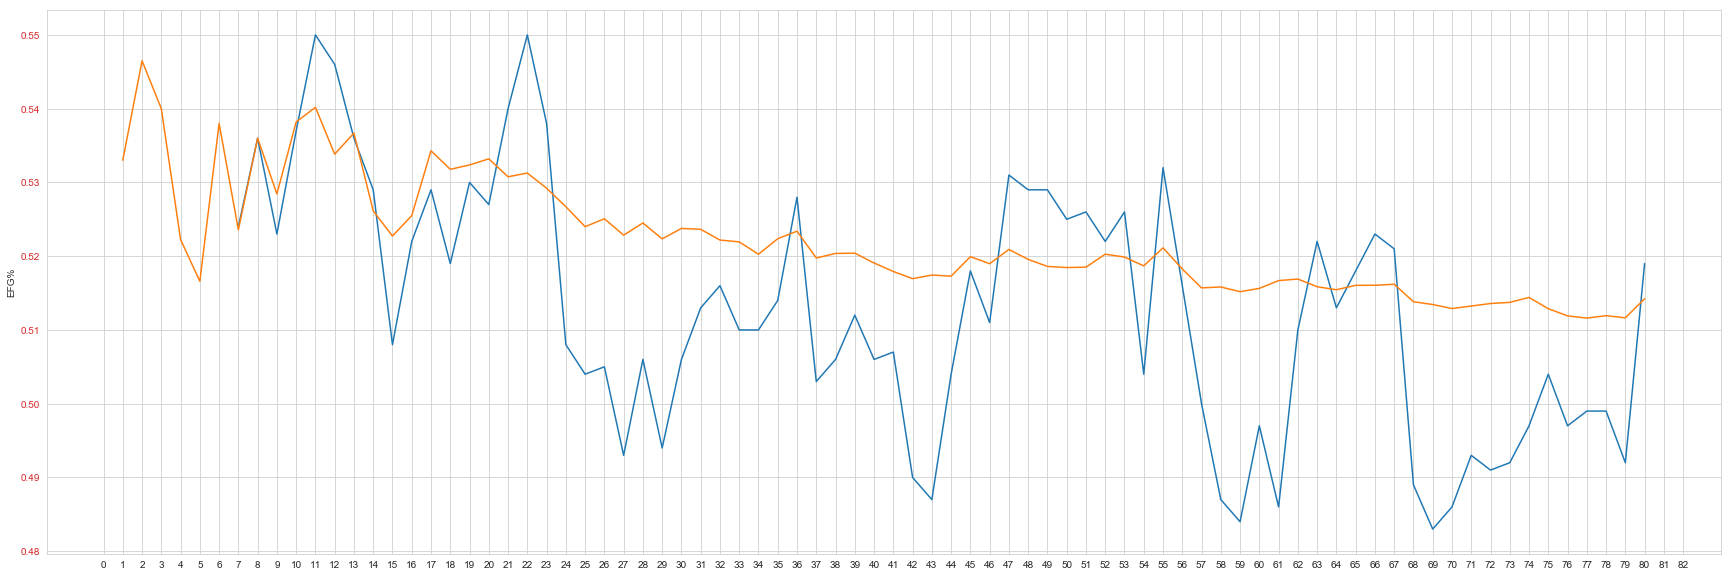

In [9]:
stat = 'EFG'
team1 = 'CHO'
team2 = 'CHO'
cols = [f'Rolling7EFG', 'SeasonEFG']
predict = 'Result'


sns.set_style('whitegrid')
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 10)
plt.xticks(np.arange(0, 83, 1))
ax1.set_ylabel(f'{stat}%')
ax1.tick_params(axis = 'y', labelcolor = 'tab:red')
ax1.plot(a[a['Team']==team1][cols].reset_index(drop=True))
ax1.plot(leagueEFG[f'LeagueEFG'])
# ax1.plot(a[a['Team']==team2][cols].reset_index(drop=True), color = 'blue')
# ax1.plot(tst.reset_index(drop = True))


ax3 = ax1.twinx()
ax3.set_ylabel(f'{stat}')
ax3.scatter(y = a[a['Team']==team1][f'{predict}'], x = a[a['Team']==team1]['Game Number'])
ax3.tick_params(axis = 'y', labelcolor = 'tab:blue')

In [111]:
def test_derivative_DataFrame_with_float_index():
    x = np.arange(0, 2 * np.pi + 0.05, 0.05)
    y1 = np.sin(x)
    y2 = np.cos(x)

    df = pd.DataFrame({"y1": y1, "y2": y2}, index=x)
    df.index.name = "x"

    dy1dx = df["y1"].calc.derivative()

    assert ((dy1dx - df["y2"]).fillna(0).abs() > 0.05).sum() == 0

    # test derivative using column name
    dfdt = df.reset_index().calc.derivative(var="x")
    assert dfdt.iloc[-1]["y1"] == pytest.approx(1.0, 0.001)
    # assert dfdt.iloc[-1]['y2'] == pytest.approx(0.0, 0.1)
    return dfdt

In [86]:
a=test_derivative_DataFrame_with_float_index()

In [109]:
tst = a[a['Team']=='HOU']['Rolling7EFG'].calc.derivative()

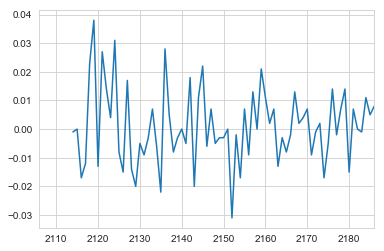

In [110]:
tst.plot()

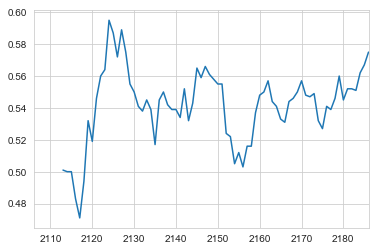

In [103]:
a[a['Team']=='HOU']['Rolling7EFG'].plot()

In [320]:
db = db19

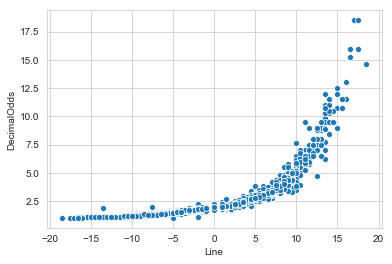

In [418]:
sns.scatterplot(x = 'Line', y= 'DecimalOdds', data = db)

In [6]:
db[(db['Line']<7.5) & (db['DecimalOdds']>5)][['Team','Date','Line', 'DecimalOdds', 'Odds']]

NameError: name 'db' is not defined

In [32]:
db = pd.read_csv('2015stats.csv')
league_db = pd.read_csv('2015LeagueStats.csv')

In [37]:
db['Rolling7EFG_delLeague'] = np.zeros(len(db))
db['Rolling7ORB_delLeague'] = np.zeros(len(db))
db['Rolling7TOV_delLeague'] = np.zeros(len(db))
db['Rolling7FTR_delLeague'] = np.zeros(len(db))
db['Rolling7OEff_delLeague'] = np.zeros(len(db))
db['Rolling7DEff_delLeague'] = np.zeros(len(db))
    

for i, date in enumerate(db['Date']):
    
    db['Rolling7EFG_delLeague'][i] = (db['Rolling7EFG'][i] - league_db[league_db['Date']==date]['LeagueEFG'])*100.0
    db['Rolling7ORB_delLeague'][i] = (db['Rolling7ORB'][i] - league_db[league_db['Date']==date]['LeagueORB'])*100.0
    db['Rolling7TOV_delLeague'][i] = (db['Rolling7TOV'][i] - league_db[league_db['Date']==date]['LeagueTOV'])*100.0
    db['Rolling7FTR_delLeague'][i] = (db['Rolling7FTR'][i] - league_db[league_db['Date']==date]['LeagueFTR'])*100.0
    db['Rolling7OEff_delLeague'][i] = db['Rolling7OEff'][i] - league_db[league_db['Date']==date]['LeagueEff']
    db['Rolling7DEff_delLeague'][i] = db['Rolling7DEff'][i] - league_db[league_db['Date']==date]['LeagueEff']

In [38]:
db

,Team,Location,Game Number,Team Points,Opp Points,Result,Date,Opponent,EFG%,TOV%,...,SeasonPace,SeasonOEff,SeasonDEff,Margin,Rolling7EFG_delLeague,Rolling7ORB_delLeague,Rolling7TOV_delLeague,Rolling7FTR_delLeague,Rolling7OEff_delLeague,Rolling7DEff_delLeague
0,CLE,1,1,90,95,0,20141030,NYK,0.521,0.194,...,NaN,NaN,NaN,-5,NaN,NaN,NaN,NaN,NaN,NaN
1,CLE,0,2,114,108,1,20141031,CHI,0.409,0.071,...,83.100000,108.300000,114.300000,6,NaN,NaN,NaN,NaN,NaN,NaN
2,CLE,0,3,82,101,0,20141104,POR,0.418,0.133,...,87.300000,110.550000,110.600000,-19,NaN,NaN,NaN,NaN,NaN,NaN
3,CLE,0,4,100,102,0,20141105,UTA,0.458,0.118,...,87.566667,104.700000,111.933333,-2,NaN,NaN,NaN,NaN,NaN,NaN
4,CLE,0,5,110,101,1,20141107,DEN,0.512,0.075,...,87.450000,107.250000,113.250000,9,NaN,NaN,NaN,NaN,NaN,NaN
5,CLE,1,6,118,111,1,20141110,NOP,0.574,0.087,...,89.300000,108.560000,111.500000,7,NaN,NaN,NaN,NaN,NaN,NaN
6,CLE,0,7,122,121,1,20141114,BOS,0.553,0.098,...,89.216667,112.616667,113.750000,1,NaN,NaN,NaN,NaN,NaN,NaN
7,CLE,1,8,127,94,1,20141115,ATL,0.650,0.120,...,91.057143,113.600000,114.428571,33,-0.351752,0.620423,-2.125413,6.015130,7.097451,7.926451
8,CLE,1,9,97,106,0,20141117,DEN,0.494,0.144,...,91.850000,115.700000,112.187500,-9,1.675423,0.856631,-3.175122,4.171992,10.414206,5.543206
9,CLE,1,10,90,92,0,20141119,SAS,0.488,0.153,...,92.088889,114.311111,112.255556,-2,2.627342,-1.527937,-1.984517,3.844172,8.597917,5.940917
